# **Modeling Data Using a Graph.**

In this example we explore using NetworkX to build graphs based on related data. Below are some examples that illustrate how to build a graph using this package.

Run these examples and confirm that you have NetworkX correctly installed. Then complete questions 1 - 4 below.

It is recommended that you upload and run this notebook on [Colab](https://colab.research.google.com/)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)



In [4]:
# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}


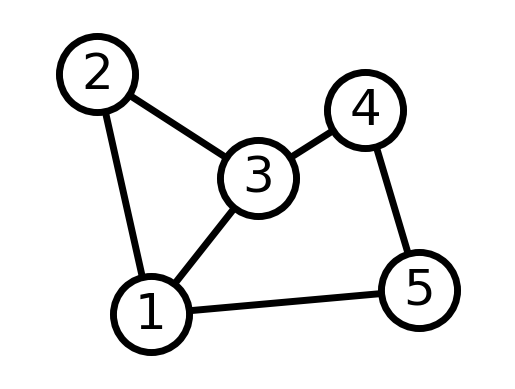

In [5]:
nx.draw_networkx(G, pos, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# Now try building a directed Graph

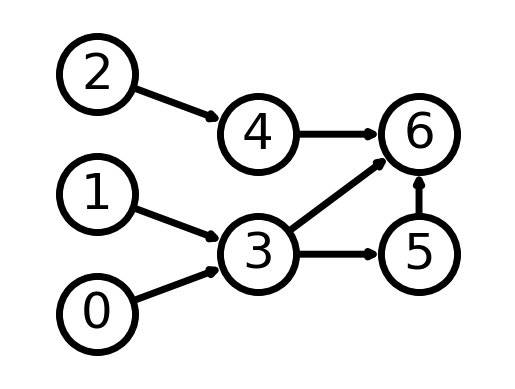

In [6]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

**Modeling Twitter Network.**

In this exercise we will model and analyze example X (Twitter )social network data. Assume we have information about a small network of Twitter users -- specifically who each user "follows". Thus we are modeling the "follows" relation using a graph.

Using the following data table below complete the stated questions.


- Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei
- Wei follows Dan, Bob, and Sam
- Bob follows Jane, Wei, and Tiana
- Tiana follows Jane and Juan
- Sally follows Bob
- Jane follows Juan and Wei
- Juan follows Sally and Jane
- Sam follows Jane

NOTE: If you have any questions about syntax or function names, search the docs. There is a search bar in the upper right of this page:

https://networkx.org/documentation/stable/reference/index.html







## Question 1.

Would you use a undirected graph or a directed graph to model this data? Explain.

To model this data, I would use a directed graph because some users follow others but are not followed back. For example, Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei, but only Wei follows Dan back.

## Question 2.

Create this graph using NetworkX and plot the resulting graph.

In [7]:
g = nx.DiGraph()

g.add_edges_from([
    ('Dan', 'Jane'), ('Dan', 'Bob'), ('Dan', 'Sally'), ('Dan', 'Sam'), ('Dan', 'Tiana'), ('Dan', 'Juan'), ('Dan', 'Wei'),
    ('Wei', 'Dan'), ('Wei', 'Bob'), ('Wei', 'Sam'),
    ('Bob', 'Jane'), ('Bob', 'Wei'), ('Bob', 'Tiana'),
    ('Tiana', 'Jane'), ('Tiana', 'Juan'),
    ('Sally', 'Bob'),
    ('Jane', 'Juan'), ('Jane', 'Wei'),
    ('Juan', 'Sally'), ('Juan', 'Jane'),
    ('Sam', 'Jane')
])

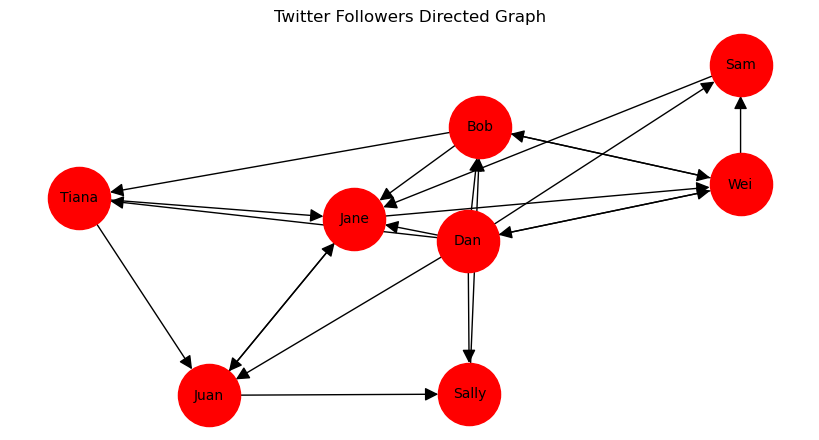

In [52]:
plt.figure(figsize=(8, 4))
nx.draw(g, with_labels=True, arrowstyle='-|>', arrowsize=20,
        node_size=2000, font_size=10, node_color='red')
plt.title("Twitter Followers Directed Graph")   
plt.show()  

## Question 3.

Assume you wanted to determine which user was the biggest "social influencer". Which graph measure would you compute and why?

We would use degree centrality to measure followers. And in this instance, in-degree centrality would help us determine how many followers each account has. Out-degree centrality would help us determine how many accounts each account follows, but isn't particularly relevant to social influence.

## Question 4.

Compute the measure chosen and determine who in this example was the biggest social influencer. See example below which analyzes facebook social network data. You will need to have data file facebook_combined.txt to complete this example.

In [26]:
# Load the facebook_combined.txt data file
# from google.colab import files
# uploaded = files.upload()

import pandas as pd

In [27]:
fb = pd.read_csv('facebook_combined.txt')
fb.head()

,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6


In [28]:
# Read in graph data from facebook data txt file.
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(G_fb)

Graph with 4039 nodes and 88234 edges


(np.float64(-0.8288437953591347),
 np.float64(1.173781537115574),
 np.float64(-1.057869584262371),
 np.float64(0.5542248198390007))

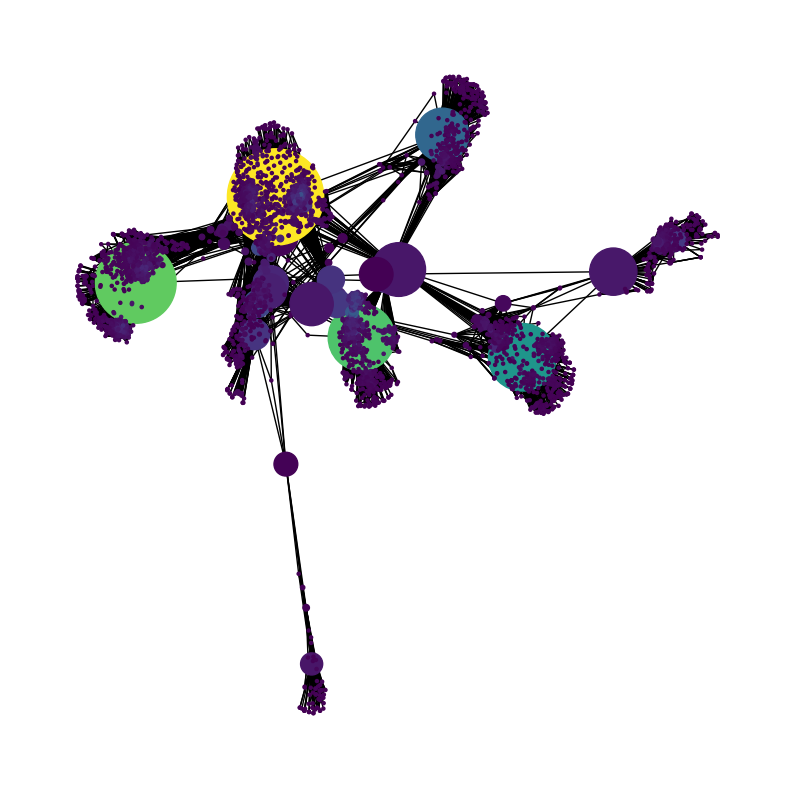

In [42]:
# Compute measures of centrality and degree for the nodes. These attributes can
# be used to help analyze the graph. Then the graph is plotted and color and size
# of the nodes are used to indicate size and betweeness, respectively. (Note: This
# is a large data set and may take 5+ minutes to run.)

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

**Nodes with the highest betweeness**

In [31]:
# Identify the top 5 nodes with highest betweeness measures.
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

**In-Degree Twitter Followers**

In [43]:
# .in_degree
followers = dict(g.in_degree)
followers

{'Dan': 1,
 'Jane': 5,
 'Bob': 3,
 'Sally': 2,
 'Sam': 2,
 'Tiana': 2,
 'Juan': 3,
 'Wei': 3}

In [51]:
pop_user = max(followers, key=followers.get)
num_followers = followers[pop_user]

print(pop_user, 'has the most followers with', num_followers)

Jane has the most followers with 5


As we can see, Jane has the most followers with 5. While I understand the benefits of using betweeness centrality in a large dataset like the facebook example, I think in-degree centrality is more relevant in this case because it measures followers (direct influence on others) in a small network.